In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2024-challenge1/sample_submission.csv
/kaggle/input/widsdatathon2024-challenge1/training.csv
/kaggle/input/widsdatathon2024-challenge1/test.csv


# Import Libraries

In [44]:
# Basic
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Visualization
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

## ML
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import RocCurveDisplay

# Import data

In [115]:
train = pd.read_csv(r'/kaggle/input/widsdatathon2024-challenge1/training.csv', index_col='patient_id')
test = pd.read_csv(r'/kaggle/input/widsdatathon2024-challenge1/test.csv', index_col='patient_id')
sub  = pd.read_csv(r'/kaggle/input/widsdatathon2024-challenge1/sample_submission.csv')

# Exploratory data analysis

In [46]:
train.head()

,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
patient_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.28095

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12906 entries, 475714 to 179597
Data columns (total 82 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_race                           6521 non-null   object 
 1   payer_type                             11103 non-null  object 
 2   patient_state                          12855 non-null  object 
 3   patient_zip3                           12906 non-null  int64  
 4   patient_age                            12906 non-null  int64  
 5   patient_gender                         12906 non-null  object 
 6   bmi                                    3941 non-null   float64
 7   breast_cancer_diagnosis_code           12906 non-null  object 
 8   breast_cancer_diagnosis_desc           12906 non-null  object 
 9   metastatic_cancer_diagnosis_code       12906 non-null  object 
 10  metastatic_first_novel_treatment       24 non-null     object 
 11  m

In [48]:
train.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
patient_race,6521,5,White,3588
payer_type,11103,3,COMMERCIAL,6032
patient_state,12855,50,CA,2438
patient_gender,12906,1,F,12906
breast_cancer_diagnosis_code,12906,50,1749,1982
breast_cancer_diagnosis_desc,12906,50,"Malignant neoplasm of breast (female), unspeci...",1982
metastatic_cancer_diagnosis_code,12906,43,C773,7052
metastatic_first_novel_treatment,24,2,PEMBROLIZUMAB,13
metastatic_first_novel_treatment_type,24,1,Antineoplastics,24
Region,12854,4,South,3919


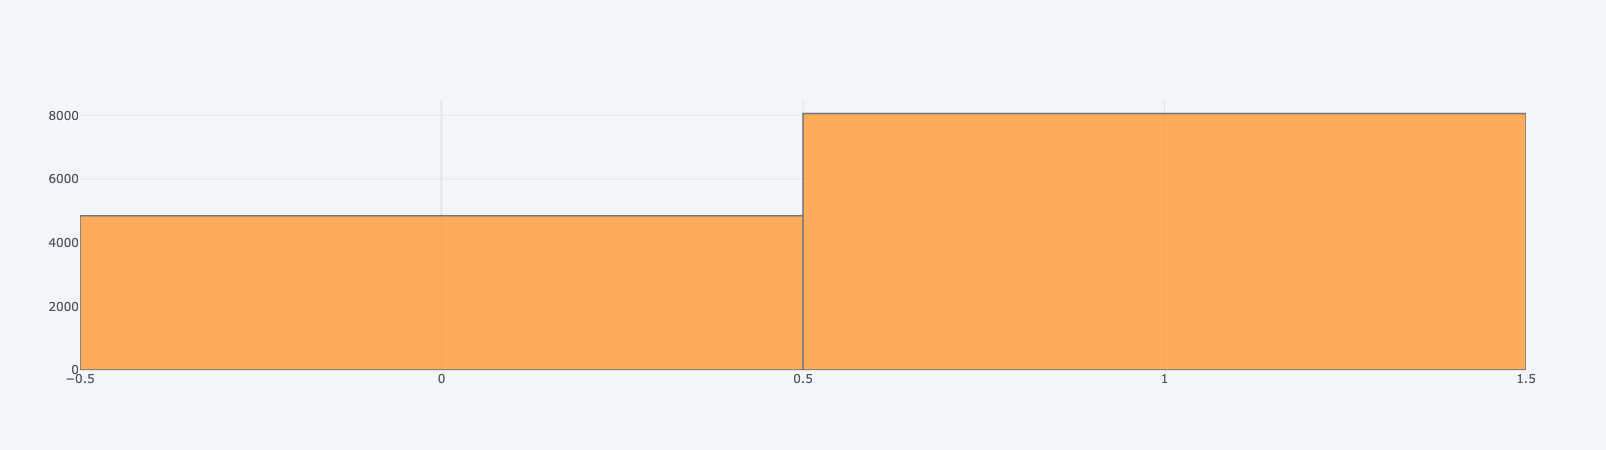

In [78]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
train['DiagPeriodL90D'].iplot(kind='hist')

In [49]:
train.isna().sum().sort_values(ascending=False)

metastatic_first_novel_treatment         12882
metastatic_first_novel_treatment_type    12882
bmi                                       8965
patient_race                              6385
payer_type                                1803
Region                                      52
Division                                    52
patient_state                               51
PM25                                        29
Ozone                                       29
N02                                         29
income_household_under_5                     4
income_household_5_to_10                     4
income_household_10_to_15                    4
income_household_100_to_150                  4
income_household_15_to_20                    4
income_household_20_to_25                    4
income_household_25_to_35                    4
income_household_50_to_75                    4
income_household_75_to_100                   4
rent_median                                  4
income_househ

# Remove 2 cols have > 50% missing values and a description col

In [116]:
train = train.drop(['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type'], axis = 1)

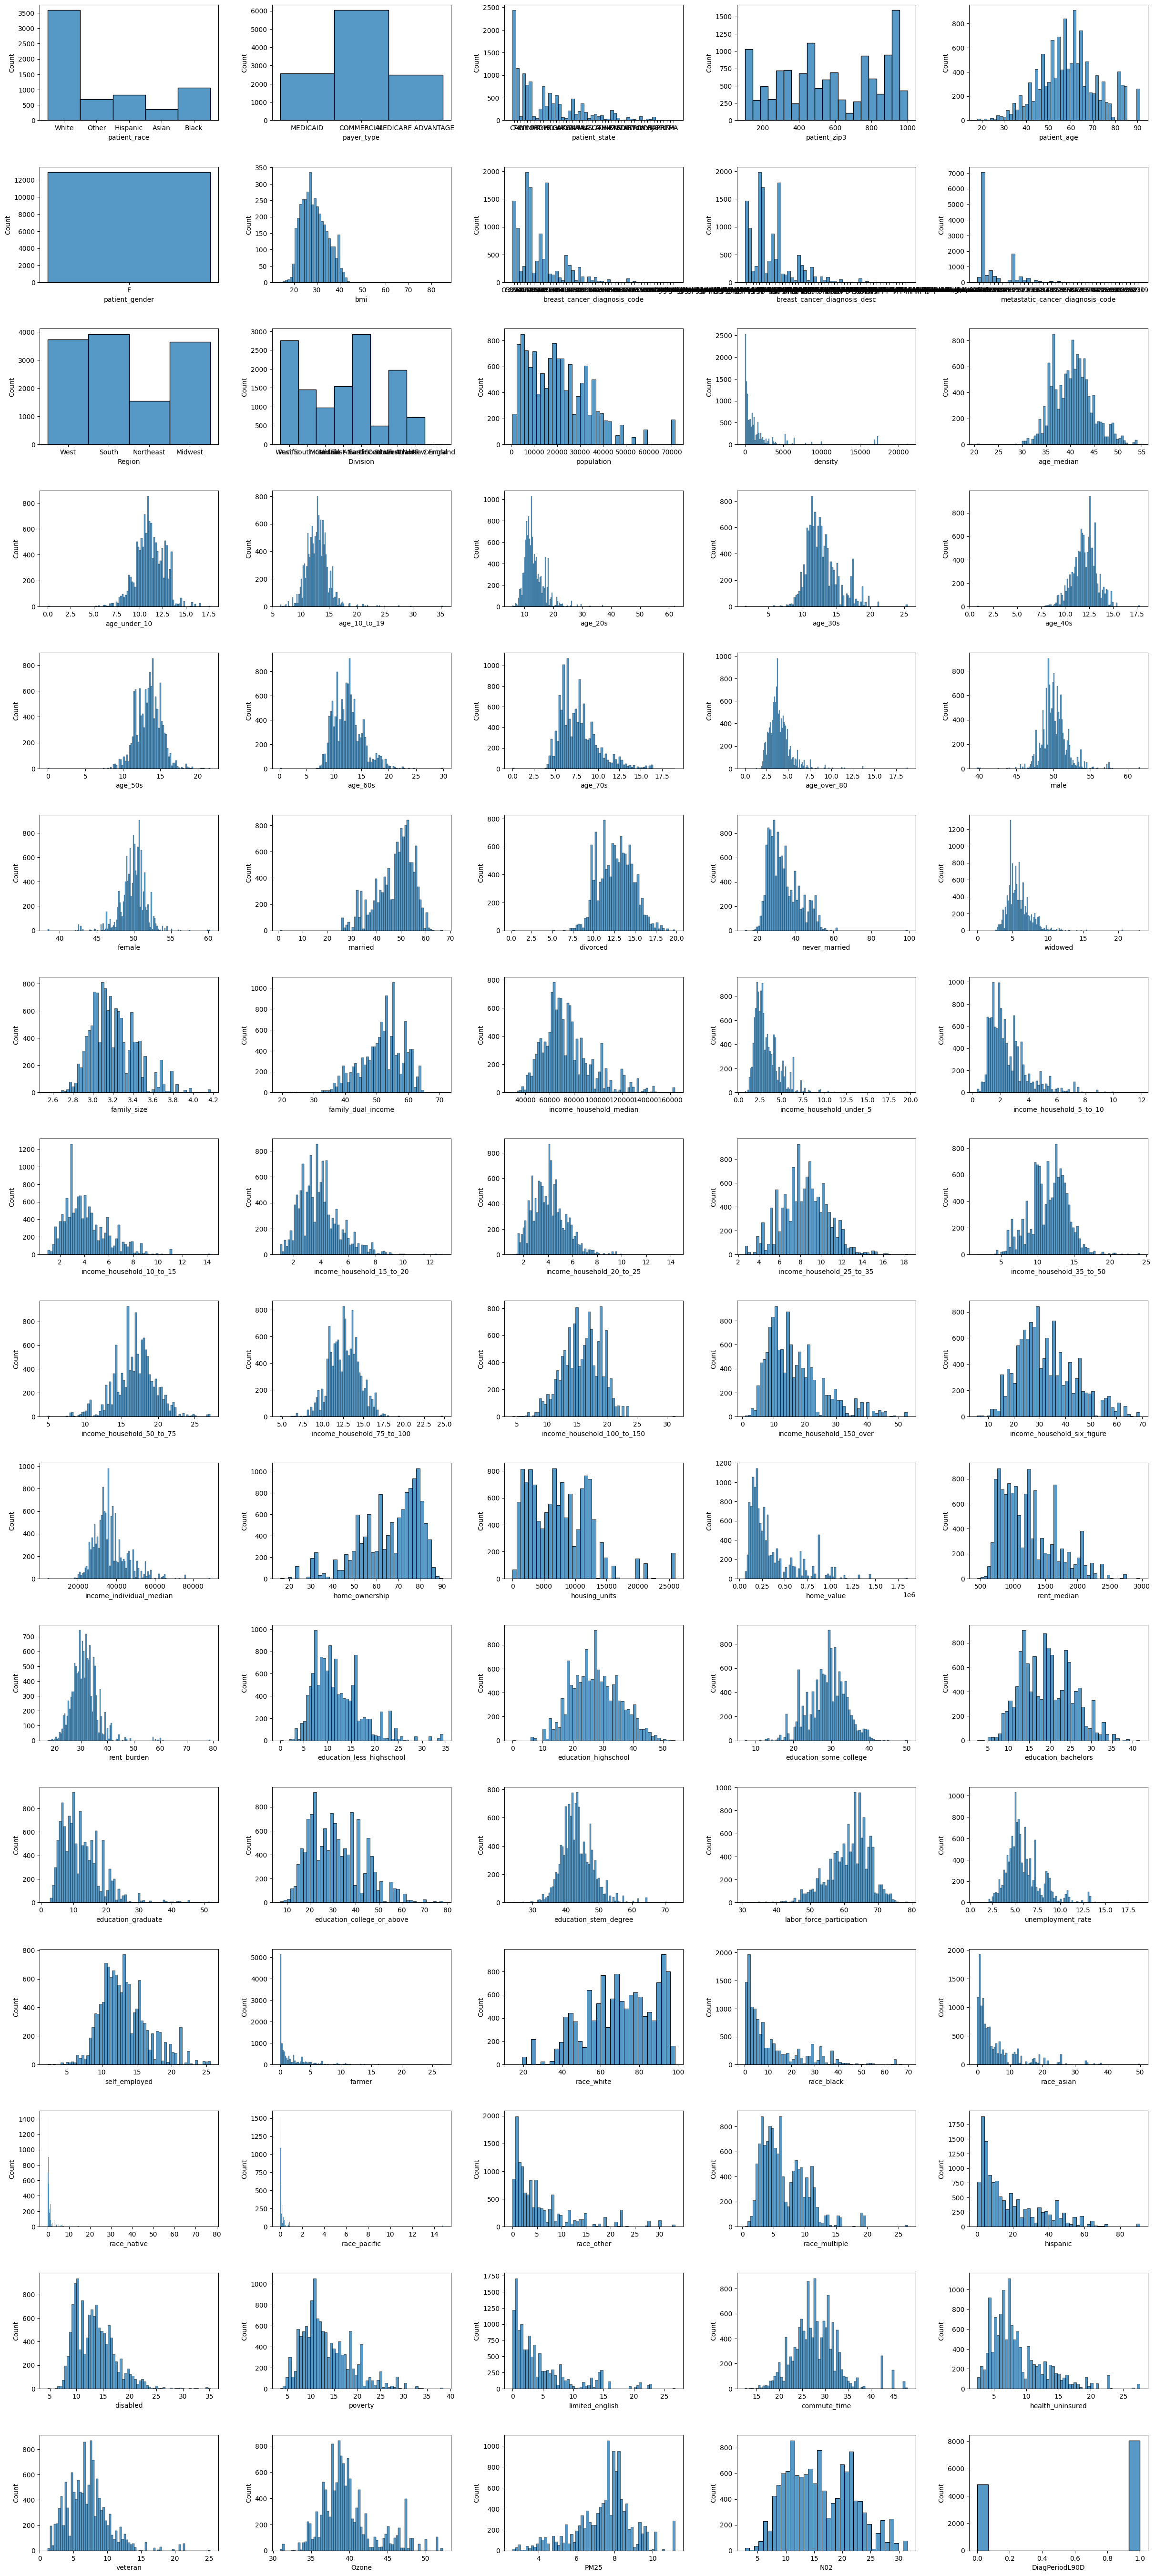

In [117]:
fig, ax = plt.subplots(16, 5, figsize=(30, 60))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.3, hspace=0.4)
for variable, subplot in zip(train.columns, ax.flatten()):
    sns.histplot(train[variable], ax=subplot)

# Remove Outliers

In [118]:
Q1, Q3 = train['bmi'].quantile([0.25, 0.75])
IQR = Q3 - Q1

outliers = train[(train['bmi'] < (Q1 - 1.5 * IQR)) | (train['bmi'] > (Q3 + 1.5 * IQR))]

outliers

,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
patient_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
306828,NaN,COMMERCIAL,OH,440,35,F,75.0,C50311,Malig neoplm of lower-inner quadrant of right ...,C773,Midwest,East North Central,15177.40351,298.300000,43.263158,11.003509,13.110526,10.403509,11.328070,12.191228,15.473684,14.045614,8.212281,4.217544,50.326316,49.673684,52.708772,12.752632,28.273684,6.268421,3.085789,52.656140,72887.14545,2.478947,2.012281,2.956140,3.694737,3.866667,8.677193,13.252632,18.131579,14.400000,16.271930,14.250877,30.522807,35253.08772,79.578947,6079.473684,185013.1667,972.528302,29.620833,10.214035,33.787719,29.766667,16.463158,9.771930,26.235088,42.833929,62.684211,4.752632,10.453571,1.544643,90.192982,3.807018,1.096491,0.131579,0.014035,0.766667,3.984211,4.252632,12.303509,10.991228,1.331579,26.750909,7.594737,7.914035,39.893560,7.673232,15.246437,1
596747,Other,NaN,CA,950,20,F,85.0,C50911,Malignant neoplasm of unsp site of right femal...,C7951,West,Pacific,22778.43590,1003.425641,40.461538,10.564103,14.464103,12.969231,12.615385,12.661538,14.258974,12.620513,6.500000,3.317949,50.184615,49.815385,49.969231,9.874359,35.423077,4.735897,3.249211,58.742105,122456.13510,2.073684,1.155263,1.823684,2.107895,1.557895,4.792105,7.350000,13.347368,10.823684,18.665789,36.302632,54.968421,49607.10526,64.013158,7715.205128,979490.5455,2120.571429,29.220588,10.707692,14.361538,27.920513,26.805128,20.202564,47.007692,57.274359,63.487179,4.943590,15.429730,1.037838,62.069231,1.241026,14.800000,1.058974,0.343590,11.115385,9.371795,27.594872,9.579487,7.113158,6.102632,29.178947,5.389744,4.146154,35.556054,5.752438,11.100666,1


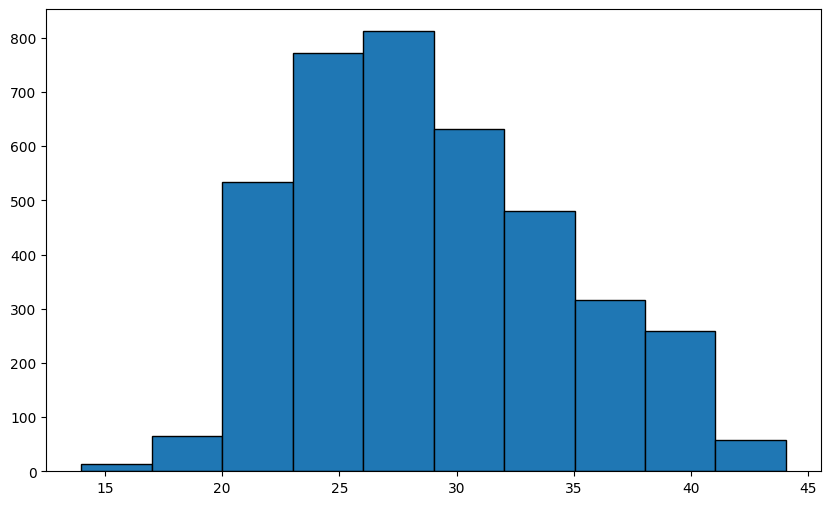

In [53]:
train = train[~train.index.isin(outliers.index)]

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(train['bmi'], edgecolor='black')
plt.show()

# Correlation Analysis

In [54]:
corr_df = train.select_dtypes(exclude='object').corr()
corr_df

,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
patient_zip3,1.000000,-0.062611,-0.052303,0.098947,-0.196685,-0.148127,0.057048,0.032296,0.095128,0.166878,0.077926,-0.210760,-0.087111,-0.085903,-0.160472,0.317623,-0.317645,0.061935,-0.050596,0.010278,-0.288279,0.272964,0.050682,0.170338,-0.031396,-0.155660,-0.114716,-0.165232,-0.142296,-0.148315,-0.182079,-0.088599,-0.056590,0.141556,0.176574,0.182239,0.120101,-0.127013,0.043885,0.341803,0.302551,0.020535,0.170967,-0.354609,0.262779,0.145347,-0.038256,0.057607,0.350229,0.048796,0.072953,0.254753,0.034096,-0.119235,-0.381464,0.294069,0.213024,0.232173,0.389128,0.524670,0.476697,-0.122004,-0.043747,0.204575,-0.158652,0.140023,0.038752,0.391425,-0.066920,-0.073631,0.036324
patient_age,-0.062611,1.000000,-0.053420,-0.018079,-0.002639,0.040234,-0.026640,-0.029569,-0.020772,-0.023672,-0.025646,0.023177,0.037825,0.028884,0.045940,-0.020082,0.020083,-0.001573,0.029276,-0.008784,0.014541,-0.062780,-0.003479,-0.035340,-0.008279,0.021624,0.005454,0.025751,0.010684,0.026619,0.035019,0.036668,0.028007,-0.007720,-0.039536,-0.033963,-0.027124,0.030226,-0.009538,-0.052660,-0.049802,-0.012852,-0.062054,0.028305,0.030815,-0.002920,-0.006712,-0.004977,-0.029056,-0.005189,-0.008110,-0.028237,-0.002517,0.040611,-0.001770,-0.035863,0.004095,-0.022929,-0.053844,-0.036001,-0.047969,0.015097,-0.000180,-0.028230,-0.034833,-0.036488,0.002293,-0.026183,-0.023254,0.014633,0.055948
bmi,-0.052303,-0.053420,1.000000,-0.038059,-0.002416,-0.025371,0.058916,0.004338,0.004224,-0.004330,-0.049765,-0.047241,0.001012,0.013164,0.005395,-0.026361,0.026359,-0.038486,0.083779,-0.001356,0.074367,-0.019044,-0.075087,-0.112139,0.053163,0.078869,0.084611,0.084844,0.095600,0.100127,0.100071,0.078709,0.006771,-0.085059,-0.111491,-0.112951,-0.094516,-0.003908,-0.033339,-0.097473,-0.103332,-0.024842,0.047690,0.094759,0.011654,-0.092333,-0.079337,-0.089557,-0.099854,-0.050501,-0.004373,-0.072848,0.043423,0.009057,0.068375,-0.087442,-0.011045,-0.035658,-0.038375,-0.032164,-0.024866,0.083925,0.077834,-0.026555,-0.042249,0.065776,0.030334,-0.025877,0.001931,-0.036673,-0.009724
population,0.098947,-0.018079,-0.038059,1.000000,0.730979,-0.550527,0.254739,0.000763,0.437061,0.636991,0.396381,-0.373076,-0.650395,-0.540137,-0.311122,-0.305756,0.305718,-0.428160,-0.358767,0.584660,-0.486019,0.487960,0.346628,0.292081,0.181521,-0.003537,-0.049145,-0.249063,-0.304242,-0.372850,-0.422400,-0.461959,-0.296713,0.142843,0.431218,0.387171,0.314937,-0.722400,0.982848,0.559564,0.631772,0.440982,0.270492,-0.609457,-0.443376,0.514485,0.416236,0.485606,0.260265,0.424629,0.263855,0.520294,-0.532158,-0.724051,0.288385,0.592043,-0.074953,0.057149,0.619622,0.475782,0.531247,-0.533214,0.102769,0.671447,0.471730,0.057859,-0.500776,0.081377,0.385492,0.672556,-0.006561
density,-0.196685,-0.002639,-0.002416,0.730979,1.000000,-0.335137,0.105544,-0.164588,0.299664,0.522585,0.207693,-0.274450,-0.403445,-0.318349,-0.123842,-0.301671,0.301656,-0.430319,-0.2851

In [55]:
corr_df[abs(corr_df) >= 0.7]

,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
patient_zip3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient_age,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,NaN,NaN,NaN,1.000000,0.730979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.722400,0.982848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.724051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
density,NaN,NaN,NaN,0.730979,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.746206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_median,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,-0.784659,NaN,NaN,NaN,0.875181,0.887057,NaN,NaN,NaN,NaN,NaN,-0.734664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_under_10,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_10_to_19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_20s,NaN,NaN,NaN,NaN,NaN,-0.784659,NaN,NaN,1.000000,NaN,NaN,-0.724604,-0.715982,NaN,NaN,NaN,NaN,-0.734601,NaN,0.828607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_30s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.745297,NaN,N

In [56]:
corr_df['DiagPeriodL90D'].abs().sort_values(ascending=True)

farmer                         0.000036
race_native                    0.000156
home_ownership                 0.000282
age_median                     0.000445
N02                            0.000823
veteran                        0.000990
age_60s                        0.001035
divorced                       0.001047
rent_burden                    0.001184
race_asian                     0.001578
never_married                  0.002461
age_70s                        0.003279
age_20s                        0.003491
race_other                     0.003752
housing_units                  0.004761
hispanic                       0.004982
income_household_50_to_75      0.006262
population                     0.006561
Ozone                          0.007955
married                        0.008791
age_under_10                   0.008960
bmi                            0.009724
age_over_80                    0.009730
female                         0.009971
male                           0.009973


# Remove farmer due to low correlation to target variable

In [119]:
train = train.drop(['farmer'], axis = 1)

# Impute Missing values

In [58]:
train.isnull().sum().sort_values(ascending=False)

bmi                                 8965
patient_race                        6384
payer_type                          1802
Division                              52
Region                                52
patient_state                         51
Ozone                                 29
PM25                                  29
N02                                   29
income_household_under_5               4
income_household_5_to_10               4
income_household_100_to_150            4
income_household_10_to_15              4
income_household_15_to_20              4
income_household_20_to_25              4
income_household_25_to_35              4
income_household_35_to_50              4
income_household_75_to_100             4
home_value                             4
income_household_150_over              4
income_household_six_figure            4
home_ownership                         4
family_dual_income                     4
rent_median                            4
rent_burden     

In [120]:
null_bmi = train[train['bmi'].isnull()]
null_bmi

,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
patient_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,West,Pacific,31437.750000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,West,Pacific,32795.325580,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,11.623810,31.142857,4.623810,3.098095,54.564286,120533.83330,3.435714,1.273810,2.180952,2.211905,2.100000,4.380952,5.885714,10.897619,10.721429,18.850000,38.057143,56.907143,55336.28571,59.221429,12171.302330,1.012474e+06,2354.738095,32.030952,5.835714,12.145238,26.269048,33.285714,22.459524,55.745238,48.938095,64.430952,5.264286,18.502381,65.014286,1.438095,18.845238,0.430952,0.252381,5.428571,8.611905,16.716667,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",C773,West,Mountain,10886.260000,116.886000,43.473469,10.824000,13.976000,9.492000,10.364000,12.600000,14.992000,14.836000,9.462000,3.466000,52.312000,47.688000,57.882000,14.964000,21.760000,5.406000,3.352653,47.214286,61075.13043,2.594000,1.960000,3.168000,3.240000,4.778000,11.462000,15.656000,22.432000,12.480000,13.620000,8.606000,22.226000,29073.18367,77.098000,3768.060000,2.498457e+05,919.743590,27.029730,11.576000,29.590000,39.168000,13.978000,5.684000,19.662000,42.332653,57.488000,4.258000,13.029545,86.712000,0.426000,0.656000,0.760000,0.108000,5.080000,6.258000,13.334000,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0
111545,White,MEDICARE ADVANTAGE,NY,141,66,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",C7981,Northeast,Middle Atlantic,5643.771429,219.362857,45.180000,8.511429,14.857143,11.088571,9.754286,13.614286,13.374286,15.685714,9.445714,3.645714,50.911429,49.091429,51.322857,11.760000,30.831429,6.091429,2.908788,54.772727,71005.10000,1.505882,1.091176,3.588235,3.

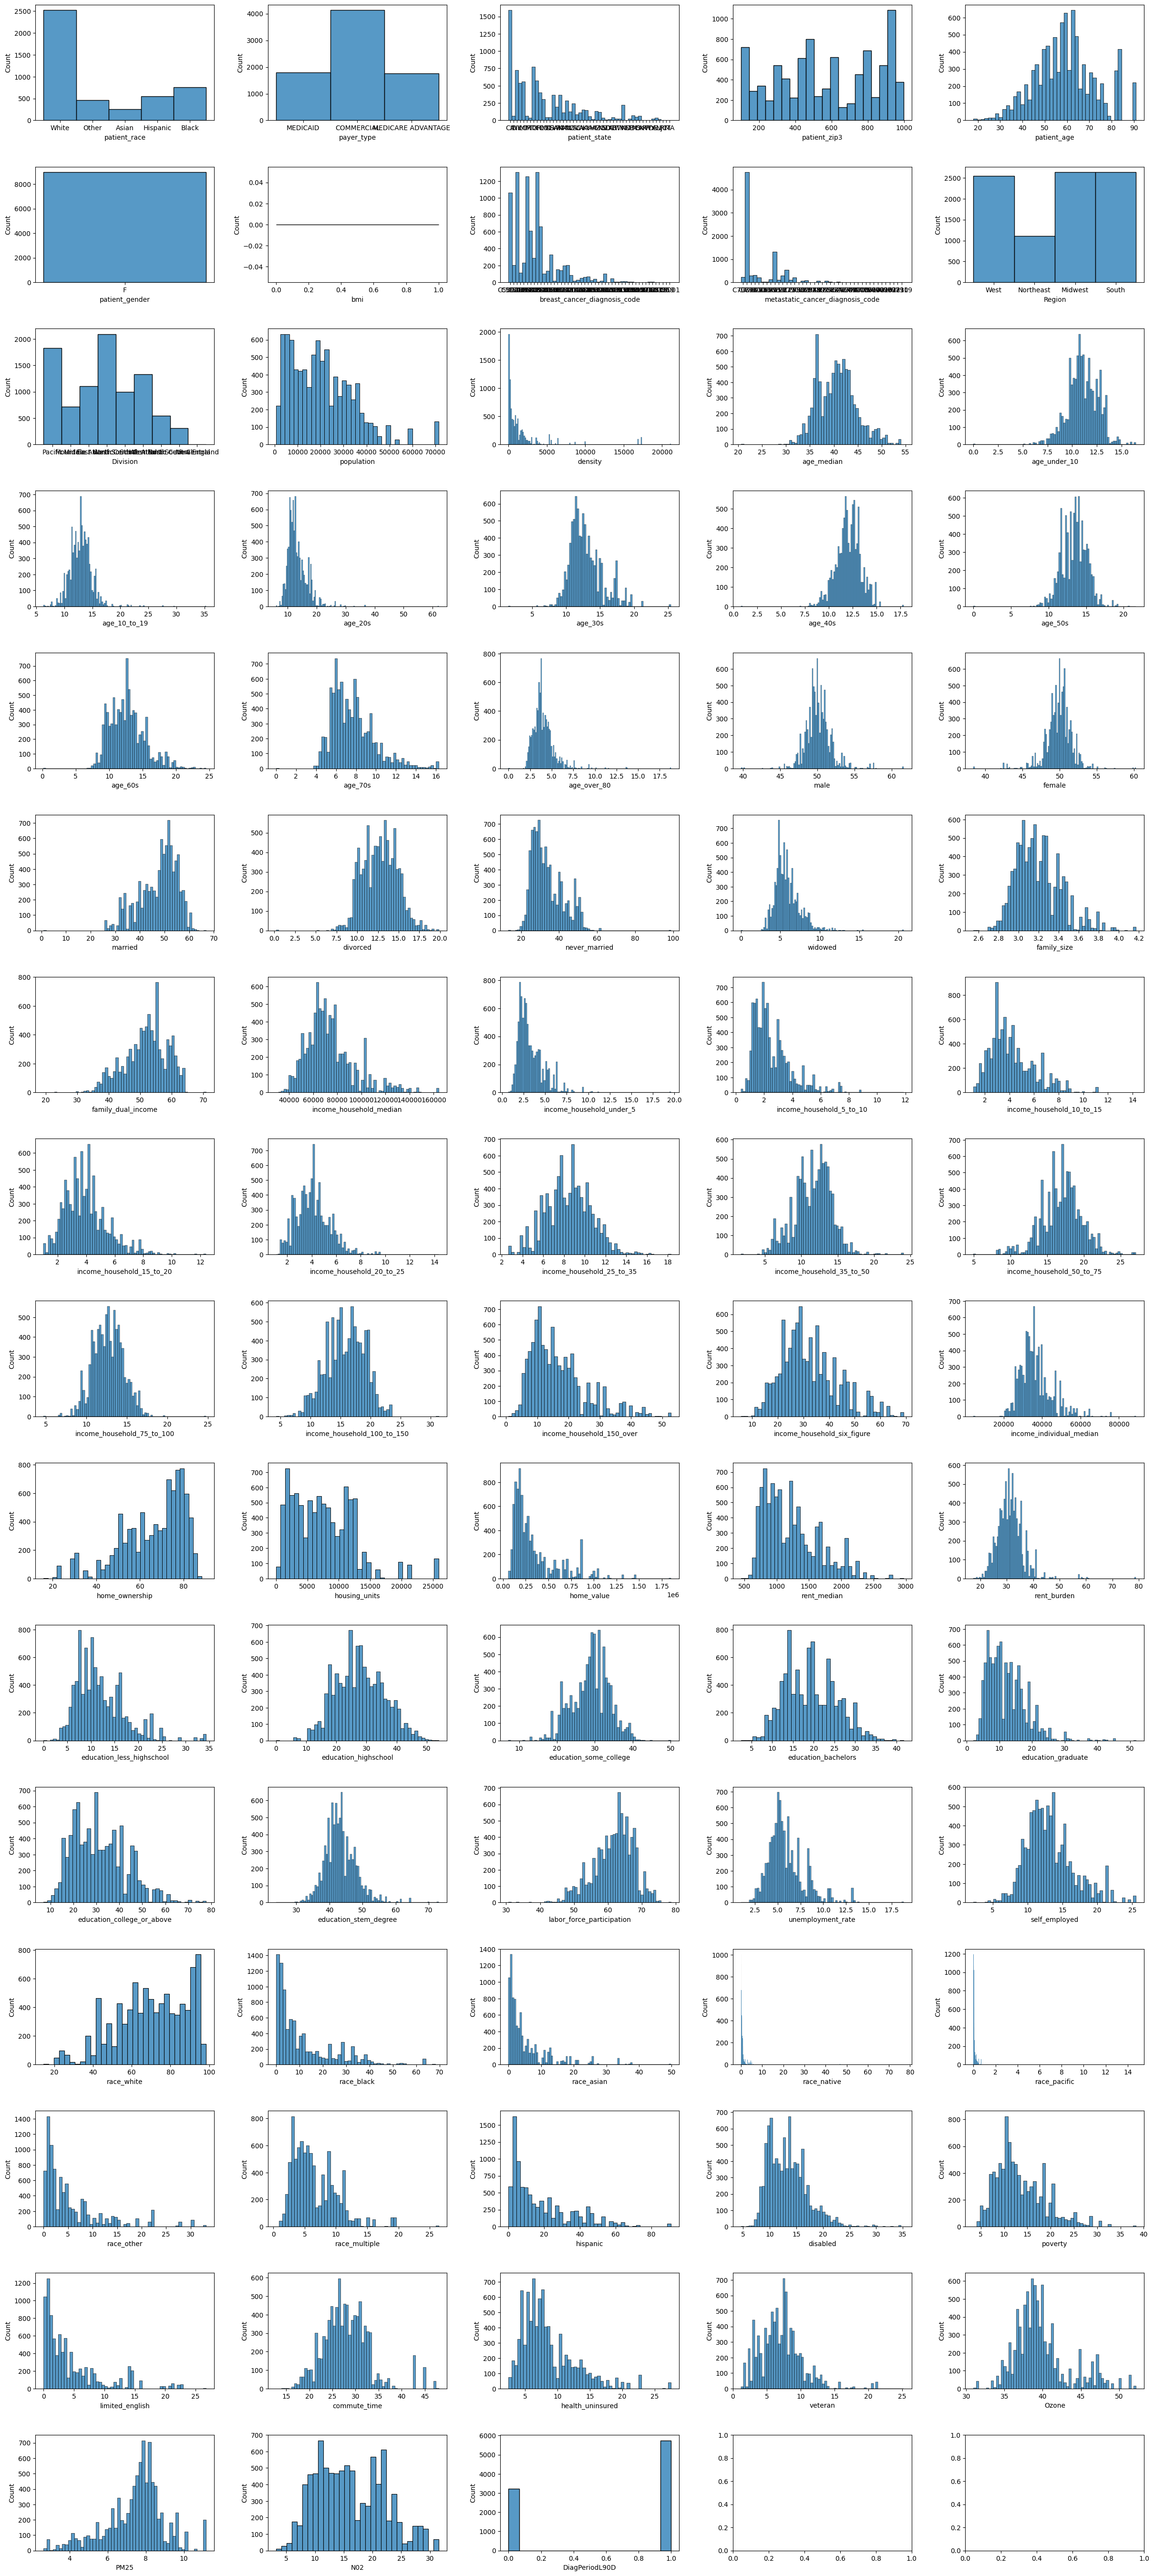

In [60]:
fig, ax = plt.subplots(16, 5, figsize=(30, 60))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.3, hspace=0.4)
for variable, subplot in zip(null_bmi.columns, ax.flatten()):
    sns.histplot(null_bmi[variable], ax=subplot)

In [61]:
null_race = train[train['patient_race'].isnull()]
null_race

,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
patient_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,C7989,West,Pacific,31437.750000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,C773,West,Mountain,10886.260000,116.886000,43.473469,10.824000,13.976000,9.492000,10.364000,12.600000,14.992000,14.836000,9.462000,3.466000,52.312000,47.688000,57.882000,14.964000,21.760000,5.406000,3.352653,47.214286,61075.13043,2.594000,1.960000,3.168000,3.240000,4.778000,11.462000,15.656000,22.432000,12.480000,13.620000,8.606000,22.226000,29073.18367,77.098000,3768.060000,2.498457e+05,919.743590,27.029730,11.576000,29.590000,39.168000,13.978000,5.684000,19.662000,42.332653,57.488000,4.258000,13.029545,86.712000,0.426000,0.656000,0.760000,0.108000,5.080000,6.258000,13.334000,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0
914071,NaN,COMMERCIAL,CA,900,51,F,29.05,C50912,C779,West,Pacific,36054.117650,5294.330882,36.653846,9.761538,11.267692,17.233846,17.441538,13.090769,12.304615,9.407692,5.673846,3.824615,50.510769,49.489231,33.478462,11.301538,50.456923,4.766154,3.442857,55.531746,69266.69355,6.320312,2.953125,6.806250,4.175000,4.125000,7.843750,10.164062,14.417188,10.479688,13.726562,18.962500,32.689062,36053.40000,31.504687,12949.117650,8.737560e+05,1651.145161,37.367742,22.915385,18.236923,21.269231,23.886154,13.689231,37.575385,41.748438,64.387692,8.683077,21.233333,42.824615,12.216923,12.703077,1.120000,0.146154,22.135385,8.850769,45.526154,11.901538,20.760000,14.737500,30.709375,10.341538,3.030769,41.186992,11.166898,21.644261,1
155485,NaN,COMMERCIAL,IL,617,64,F,NaN,C50912,C773,Midwest,East North Central,4435.320755,68.001887,41.300000,12.835849,13.681132,10.524528,11.937736,11.658491,13.577358,13.743396,7.686792,4.341509,49.396226,50.603774,57.896226,10.898113,24.954717,6.247170,3.008868,55.184906,75568.25490,2.954717,1.073585,2.056604,2.667925,2.781132,9.596226,12.718868,17.556604,15.303774,20.156604,13.126415,33.283019,38353.98077,81.622642,1756.981132,1.476496e+05,823.416667,24.945238,5.084906,37.598113,30.530189,19.143396,7.650943,26.794340,40.007692,64.432075,3.66

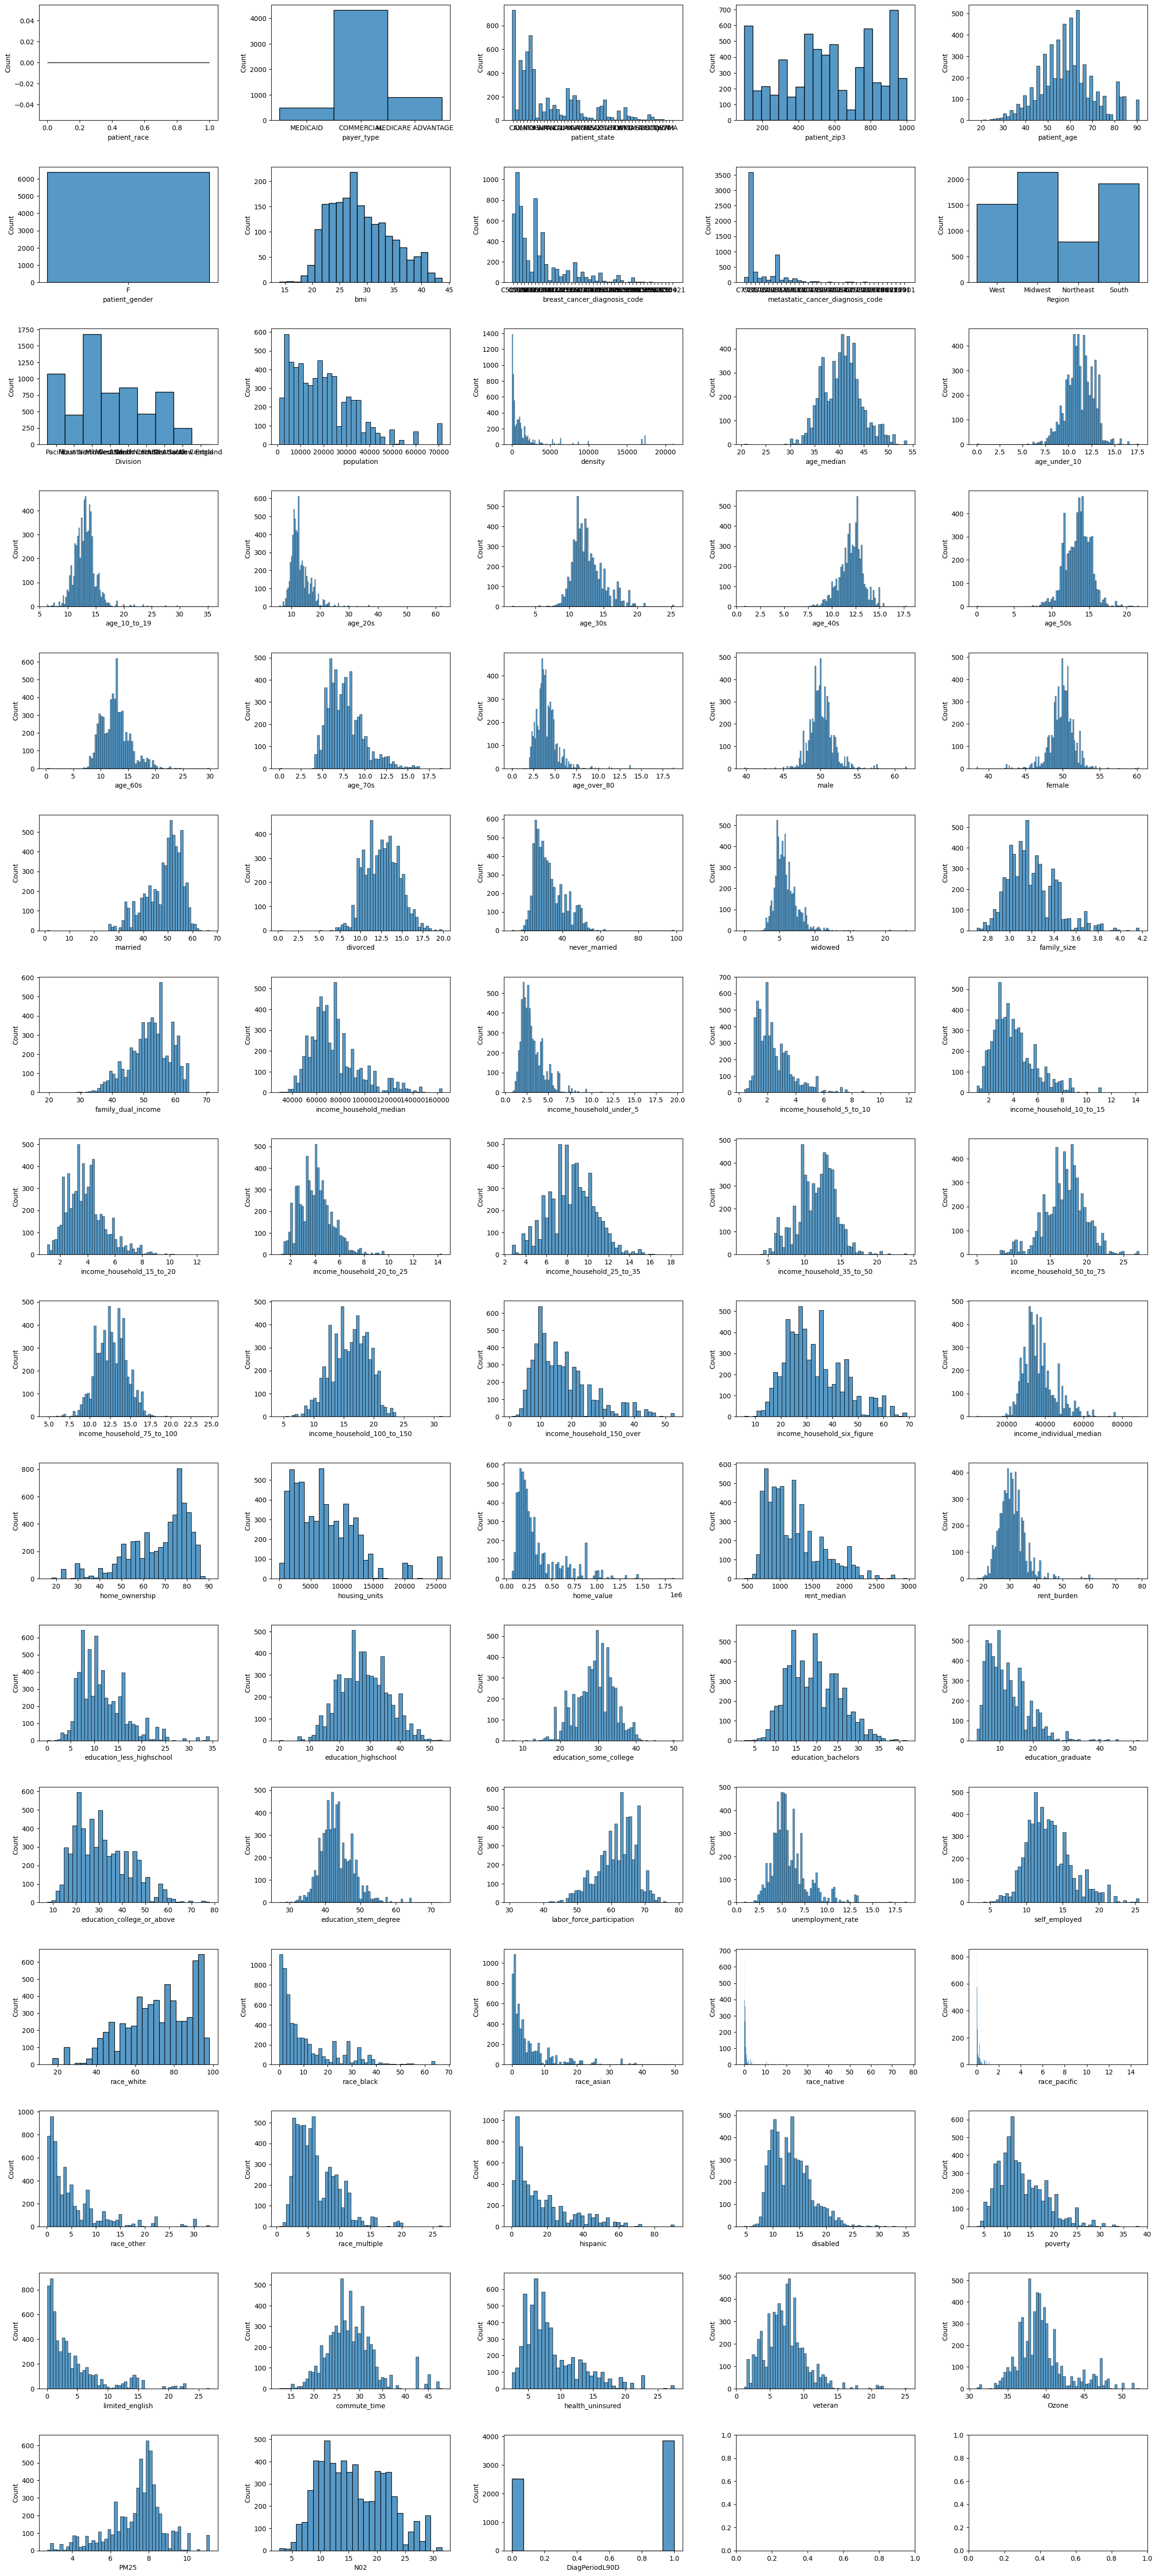

In [62]:
fig, ax = plt.subplots(16, 5, figsize=(30, 60))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.3, hspace=0.4)
for variable, subplot in zip(null_race.columns, ax.flatten()):
    sns.histplot(null_race[variable], ax=subplot)

In [121]:
# Imputing numerical variables
num_var = train.select_dtypes(exclude = 'object').columns.tolist()
imp = SimpleImputer(strategy='median')

imp.fit(train[num_var])
train[num_var] = imp.transform(train[num_var])

In [122]:
# Imputing categorical variables
cat_var = train.select_dtypes(include = 'object').columns.tolist()
imp = SimpleImputer(strategy="most_frequent")

imp.fit(train[cat_var])
train[cat_var] = imp.transform(train[cat_var])

In [123]:
train.isnull().sum().sort_values(ascending=False)

patient_race                        0
rent_burden                         0
education_stem_degree               0
education_college_or_above          0
education_graduate                  0
education_bachelors                 0
education_some_college              0
education_highschool                0
education_less_highschool           0
rent_median                         0
unemployment_rate                   0
home_value                          0
housing_units                       0
home_ownership                      0
income_individual_median            0
income_household_six_figure         0
income_household_150_over           0
income_household_100_to_150         0
labor_force_participation           0
self_employed                       0
income_household_50_to_75           0
poverty                             0
N02                                 0
PM25                                0
Ozone                               0
veteran                             0
health_unins

In [66]:
train.to_csv('train_clean.csv',index=False)

In [67]:
[col for col in train.columns]

['patient_race',
 'payer_type',
 'patient_state',
 'patient_zip3',
 'patient_age',
 'patient_gender',
 'bmi',
 'breast_cancer_diagnosis_code',
 'metastatic_cancer_diagnosis_code',
 'Region',
 'Division',
 'population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_le

In [124]:
select_features = train.drop(columns=['payer_type','patient_gender','breast_cancer_diagnosis_desc',
 'patient_state',
 'patient_zip3',
 'breast_cancer_diagnosis_code',
 'metastatic_cancer_diagnosis_code',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_dual_income',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_stem_degree',
 'self_employed'])

select_features

,patient_race,patient_age,bmi,Region,Division,population,density,family_size,income_household_median,income_individual_median,education_bachelors,education_graduate,education_college_or_above,labor_force_participation,unemployment_rate,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
patient_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
475714,White,84.0,28.19,West,Pacific,31437.75000,1189.562500,3.928571,52996.28571,24563.57143,8.357143,3.257143,11.614286,61.528571,8.471429,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1.0
349367,White,62.0,28.49,West,Pacific,39121.87879,2295.939394,3.622727,102741.63640,41287.27273,23.739394,12.245455,35.984848,65.230303,5.103030,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1.0
138632,White,43.0,38.09,South,West South Central,21996.68333,626.236667,3.260667,85984.74138,40399.03333,19.678333,10.115000,29.793333,66.428333,4.560000,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1.0
617843,White,45.0,28.19,West,Pacific,32795.32558,1896.220930,3.098095,120533.83330,55336.28571,33.285714,22.459524,55.745238,64.430952,5.264286,65.014286,1.438095,18.845238,0.430952,0.252381,5.428571,8.611905,16.716667,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0.0
817482,White,55.0,28.19,West,Mountain,10886.26000,116.886000,3.352653,61075.13043,29073.18367,13.978000,5.684000,19.662000,57.488000,4.258000,86.712000,0.426000,0.656000,0.760000,0.108000,5.080000,6.258000,13.334000,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674178,White,50.0,32.11,Midwest,East North Central,19413.05882,1196.805882,3.039412,48452.41176,27888.52941,14.400000,8.370588,22.770588,61.429412,9.135294,62.182353,27.770588,1.217647,0.270588,0.064706,2.476471,6.005882,7.747059,17.400000,23.600000,0.864706,19.841176,6.300000,6.247059,38.753055,8.068682,21.140731,1.0
452909,White,50.0,28.19,West,Pacific,30153.87952,976.289157,3.271125,122863.89610,52778.65000,26.903704,18.277778,45.181481,63.281481,5.332099,54.060494,5.906173,21.497531,0.586420,0.695062,7.986420,9.274074,21.861728,11.243210,7.837037,5.411250,34.700000,3.845679,5.671605,36.469947,6.265266,10.728732,1.0
357486,White,61.0,29.24,West,Pacific,32795.32558,1896.220930,3.098095,120533.83330,55336.28571,33.285714,22.459524,55.745238,64.430952,5.264286,65.014286,1.438095,18.845238,0.430952,0.252381,5.428571,8.611905,16.716667,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,1.0


# Encoding categorical variables

In [125]:
cat_var = select_features.select_dtypes(include = 'object').columns.tolist()

In [126]:
select_features = pd.get_dummies(select_features, columns=cat_var)
select_features

,patient_age,bmi,population,density,family_size,income_household_median,income_individual_median,education_bachelors,education_graduate,education_college_or_above,labor_force_participation,unemployment_rate,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,patient_race_Asian,patient_race_Black,patient_race_Hispanic,patient_race_Other,patient_race_White,Region_Midwest,Region_Northeast,Region_South,Region_West,Division_East North Central,Division_East South Central,Division_Middle Atlantic,Division_Mountain,Division_New England,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central
patient_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
475714,84.0,28.19,31437.75000,1189.562500,3.928571,52996.28571,24563.57143,8.357143,3.257143,11.614286,61.528571,8.471429,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1.0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False
349367,62.0,28.49,39121.87879,2295.939394,3.622727,102741.63640,41287.27273,23.739394,12.245455,35.984848,65.230303,5.103030,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1.0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False
138632,43.0,38.09,21996.68333,626.236667,3.260667,85984.74138,40399.03333,19.678333,10.115000,29.793333,66.428333,4.560000,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1.0,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True
617843,45.0,28.19,32795.32558,1896.220930,3.098095,120533.83330,55336.28571,33.285714,22.459524,55.745238,64.430952,5.264286,65.014286,1.438095,18.845238,0.430952,0.252381,5.428571,8.611905,16.716667,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0.0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False
817482,55.0,28.19,10886.26000,116.886000,3.352653,61075.13043,29073.18367,13.978000,5.684000,19.662000,57.488000,4.258000,86.712000,0.426000,0.656000,0.760000,0.108000,5.080000,6.258000,13.334000,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0.0,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674178,50.0,32.11,19413.05882,1196.805882,3.039412,48452.41176,27888.52941,14.400000,8.370588,22.770588,61.429412,9.135294,62.182353,27.770588,1.217647,0.270588,0.064706,2.476471,6.005882,7.747059,17.400000,23.600000,0.864706,19.841176,6.300000,6.247059,38.753055,8.068682,21.140731,1.0,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False
452909,50.0,28.19,30153.87952,976.289157,3.271125,122863.89610,52778.65000,26.903704,18.277778,45.181481,63.281481,5.332099,54.060494,5.906173,21.497531,0.586420,0.695062,7.986420,9.274074,21.861728,11.243210,7.837037,5.411250,34.700000,3.845679,5.671605,36.469947,6.265266,10.728732,1.0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False
357486,61.0,29.24,32795.32558,1896.220930,3.098095,120533.83330,55336.28571,33.285714,22.459524,55.745238,64.430952,5.264286,65.014286,1.438095,18.845238,0.430952,0.252381,5.428571,8.611905,16.716667,8.845238,8.688095,5

# Split train test set

In [127]:
from sklearn.model_selection import train_test_split
X = select_features.drop(columns = "DiagPeriodL90D")
y = select_features.DiagPeriodL90D

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10324, 47), (2582, 47), (10324,), (2582,))

In [128]:
y.unique()

array([1., 0.])

In [129]:
sum(y_test)/len(y_test)

0.6243222308288149

# XGBoost

In [130]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=1, seed=42)
model_xgb.fit(X_train,
           y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test, y_test)]
           )

[0]	validation_0-aucpr:0.69996
[1]	validation_0-aucpr:0.70858
[2]	validation_0-aucpr:0.71465
[3]	validation_0-aucpr:0.71321
[4]	validation_0-aucpr:0.71534


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-aucpr:0.70985
[6]	validation_0-aucpr:0.71210
[7]	validation_0-aucpr:0.71278
[8]	validation_0-aucpr:0.71220
[9]	validation_0-aucpr:0.71345
[10]	validation_0-aucpr:0.71279
[11]	validation_0-aucpr:0.71001
[12]	validation_0-aucpr:0.70886
[13]	validation_0-aucpr:0.70808
[14]	validation_0-aucpr:0.70803


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=1, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

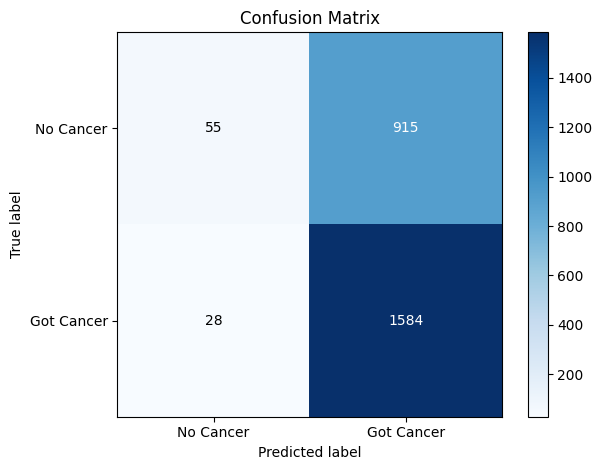

In [131]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Get predictions
y_pred = model_xgb.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(["No Cancer", "Got Cancer"]))
plt.xticks(tick_marks, ["No Cancer", "Got Cancer"])
plt.yticks(tick_marks, ["No Cancer", "Got Cancer"])

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning:

[21:34:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "learn_rate" } are not used.




weight  {'patient_age': 3.0, 'density': 1.0, 'income_household_median': 1.0, 'labor_force_participation': 1.0, 'race_black': 1.0, 'race_native': 1.0, 'race_other': 1.0, 'limited_english': 1.0, 'health_uninsured': 1.0, 'veteran': 1.0, 'patient_race_White': 1.0}
gain  {'patient_age': 117.67279815673828, 'density': 1.0644925832748413, 'income_household_median': 6.7546234130859375, 'labor_force_participation': 13.33172607421875, 'race_black': 17.673179626464844, 'race_native': 2.184051513671875, 'race_other': 7.078155517578125, 'limited_english': 1.6597442626953125, 'health_uninsured': 1.96905517578125, 'veteran': 0.2903262972831726, 'patient_race_White': 0.6127927303314209}
cover  {'patient_age': 3233.317626953125, 'density': 7.104498386383057, 'income_household_median': 71.70587158203125, 'labor_force_participation': 863.7748413085938, 'race_black': 2231.803955078125, 'race_native': 262.20556640625, 'race_other': 75.50595092773438, 'limited_english': 250.30966186523438, 'health_uninsured

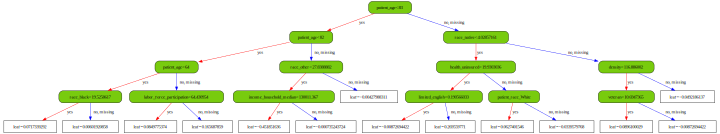

In [86]:
# Create a XGBoost Model with 'n_estimators=1', to make the tree

model_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                            gamma=0.25,             
                            learn_rate=0.1,         
                            max_depth=4,            
                            reg_lambda=10,          
                            scale_pos_weight=3,     
                            subsample=0.9,          
                            colsample_bytree=0.5,    
                            missing=None,
                            use_label_encoder=False,
                            n_estimators=1,          # build one tree, so we can get gain, cover, etc.
                            seed=42)                              

model_xgb.fit(X_train, y_train)

bst = model_xgb.get_booster()

for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    
    print('%s ' % importance_type, bst.get_score(importance_type=importance_type))
    
node_params = {'shape':'box',
               'style': 'filled, rounded',
               'fillcolor': '#78cbe'}

leaf_params = {'shape':'box',
               'style': 'fille',
               'fillcolor': '#e48038'}

xgb.to_graphviz(clf_xgb, num_tree=0, size="10,10",
                condition_node_params=node_params,
                leaf_node_params=leaf_params)

In [132]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: %.2f%%' % (accuracy*100.0))

Accuracy: 63.48%


# Apply model to Test set

In [133]:
drop_columns = ['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type','farmer','breast_cancer_diagnosis_desc','payer_type','patient_gender',
 'patient_state',
 'patient_zip3',
 'breast_cancer_diagnosis_code',
 'metastatic_cancer_diagnosis_code',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_dual_income',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_stem_degree',
 'self_employed']

In [134]:
test = test.drop(columns=drop_columns)

In [135]:
test

,patient_race,patient_age,bmi,Region,Division,population,density,family_size,income_household_median,income_individual_median,education_bachelors,education_graduate,education_college_or_above,labor_force_participation,unemployment_rate,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
patient_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
573710,White,54,NaN,Midwest,East North Central,5441.435484,85.620968,3.073226,66187.22807,33553.43333,11.895161,6.046774,17.941935,63.303226,3.406557,94.793548,0.364516,0.303226,0.119355,0.009677,0.770968,3.630645,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
593679,NaN,52,NaN,South,South Atlantic,19613.820510,1555.107692,2.917105,64711.71053,34678.61538,22.100000,12.764103,34.864103,57.035897,5.002632,78.217949,10.889744,3.453846,0.187179,0.076923,1.841026,5.328205,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
184532,Hispanic,61,NaN,West,Pacific,43030.500000,2048.578261,3.674783,86330.39130,34317.82609,20.200000,10.404348,30.604348,63.154348,6.197826,38.708696,3.963043,25.565217,1.193478,0.269565,18.858696,11.426087,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
447383,Hispanic,64,NaN,West,Pacific,43030.500000,2048.578261,3.674783,86330.39130,34317.82609,20.200000,10.404348,30.604348,63.154348,6.197826,38.708696,3.963043,25.565217,1.193478,0.269565,18.858696,11.426087,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
687972,Black,40,23.00,West,Pacific,36054.117650,5294.330882,3.442857,69266.69355,36053.40000,23.886154,13.689231,37.575385,64.387692,8.683077,42.824615,12.216923,12.703077,1.120000,0.146154,22.135385,8.850769,45.526154,11.901538,20.760000,14.737500,30.709375,10.341538,3.030769,41.186992,11.166898,21.644261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977076,White,63,29.60,South,East South Central,7765.000000,131.040000,3.036364,47693.95238,23461.00000,10.956522,5.900000,16.856522,52.500000,6.743478,95.486957,1.930435,0.321739,0.113043,0.013043,0.452174,1.673913,1.243478,20.404348,20.813636,0.350000,30.152174,6.473913,5.908696,39.947326,7.622672,9.154618
922960,White,69,NaN,Midwest,West North Central,19332.750000,346.250000,2.992500,50797.00000,30365.50000,13.575000,5.100000,18.675000,65.775000,6.675000,75.250000,14.875000,1.875000,0.250000,0.400000,2.250000,5.125000,6.175000,16.675000,15.900000,2.800000,16.800000,5.475000,6.875000,35.825340,7.610534,9.712786
759690,NaN,84,28.28,West,Pacific,28628.290910,1091.825455,3.122264,120277.07550,56562.28302,30.443396,19.211321,49.654717,68.041509,4.069811,64.613208,4.150943,17.926415,0.539623,0.728302,3.901887,8.132075,9.511321,9.752830,6.432075,5.094340,31.275472,5.309434,5.807547,36.618644,4.939852,23.393650


In [136]:
test = pd.get_dummies(test, columns = test.select_dtypes(include = 'object').columns.tolist())
test

,patient_age,bmi,population,density,family_size,income_household_median,income_individual_median,education_bachelors,education_graduate,education_college_or_above,labor_force_participation,unemployment_rate,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,patient_race_Asian,patient_race_Black,patient_race_Hispanic,patient_race_Other,patient_race_White,Region_Midwest,Region_Northeast,Region_South,Region_West,Division_East North Central,Division_East South Central,Division_Middle Atlantic,Division_Mountain,Division_New England,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central
patient_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
573710,54,NaN,5441.435484,85.620968,3.073226,66187.22807,33553.43333,11.895161,6.046774,17.941935,63.303226,3.406557,94.793548,0.364516,0.303226,0.119355,0.009677,0.770968,3.630645,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False
593679,52,NaN,19613.820510,1555.107692,2.917105,64711.71053,34678.61538,22.100000,12.764103,34.864103,57.035897,5.002632,78.217949,10.889744,3.453846,0.187179,0.076923,1.841026,5.328205,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
184532,61,NaN,43030.500000,2048.578261,3.674783,86330.39130,34317.82609,20.200000,10.404348,30.604348,63.154348,6.197826,38.708696,3.963043,25.565217,1.193478,0.269565,18.858696,11.426087,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
447383,64,NaN,43030.500000,2048.578261,3.674783,86330.39130,34317.82609,20.200000,10.404348,30.604348,63.154348,6.197826,38.708696,3.963043,25.565217,1.193478,0.269565,18.858696,11.426087,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
687972,40,23.00,36054.117650,5294.330882,3.442857,69266.69355,36053.40000,23.886154,13.689231,37.575385,64.387692,8.683077,42.824615,12.216923,12.703077,1.120000,0.146154,22.135385,8.850769,45.526154,11.901538,20.760000,14.737500,30.709375,10.341538,3.030769,41.186992,11.166898,21.644261,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977076,63,29.60,7765.000000,131.040000,3.036364,47693.95238,23461.00000,10.956522,5.900000,16.856522,52.500000,6.743478,95.486957,1.930435,0.321739,0.113043,0.013043,0.452174,1.673913,1.243478,20.404348,20.813636,0.350000,30.152174,6.473913,5.908696,39.947326,7.622672,9.154618,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False
922960,69,NaN,19332.750000,346.250000,2.992500,50797.00000,30365.50000,13.575000,5.100000,18.675000,65.775000,6.675000,75.250000,14.875000,1.875000,0.250000,0.400000,2.250000,5.125000,6.175000,16.675000,15.900000,2.800000,16.800000,5.475000,6.875000,35.825340,7.610534,9.712786,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False
759690,84,28.28,28628.290910,1091.825455,3.122264,120277.07550,56562.28302,30.443396,19.211321,49.654717,68.041509,4.069811,64.613208,4.150943,17.926415,0.539623,0.728302,3.901887,8.132075,9.511321,9.752830,6.432075,5.094340,31.275472,5.309434,5.807547,36.618644,4.939852,23.393650,Fal

In [138]:
final_pred = model_xgb.predict_proba(test)[:,1]
final_pred

array([0.57603943, 0.6133803 , 0.61613125, ..., 0.8177287 , 0.5920997 ,
       0.8700737 ], dtype=float32)

In [147]:
output = pd.DataFrame({'patient_id': test.index, 'DiagPeriodL90D': final_pred})
output.to_csv('submission.csv', index=False)

# Feature selection (Invalid - No Longer use)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# Feature extraction
model = LogisticRegression()
rfe = RFE(model, step = 8)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

In [ ]:
# Get feature ranking
feature_ranking = rfe.ranking_

# Combine feature names and their rankings
combined_rankings = list(zip(X.columns.tolist(), feature_ranking))

# Sort rankings in asc order
sorted_rankings = sorted(combined_rankings, key=lambda x: x[1])

# Extract sorted feature names and rankings
sorted_feature_names, sorted_feature_rankings = zip(*sorted_rankings)

# Plot the selected features
plt.figure(figsize=(30, 20))

plt.bar(sorted_feature_names, sorted_feature_rankings)

plt.xlabel('Feature')
plt.ylabel('Ranking')
plt.title('Sorted Feature Ranking')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
sorted_rankings

In [ ]:
rank_1_var = []
for tup in [(var, rank) for var, rank in zip(sorted_feature_names, sorted_feature_rankings) if rank < 2]:
    rank_1_var.append(tup[0])

rank_1_var

In [ ]:
len(rank_1_var)